In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Data/petrol_consumption.csv')

In [3]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
data.shape

(48, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [7]:
data.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [8]:
inputs=data[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
outputs=data[['Petrol_Consumption']]

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[]

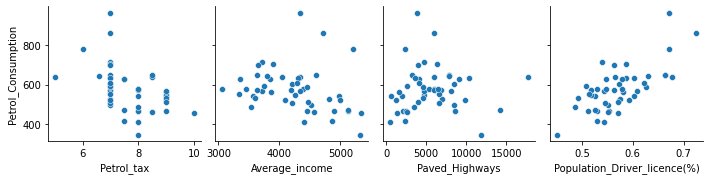

In [10]:
sns.pairplot(data=data, x_vars=inputs, y_vars=outputs)
plt.plot()

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(inputs, outputs, test_size=0.2)

In [13]:
linear=linear_model.LinearRegression()
linear=linear.fit(x_train, y_train)

In [14]:
y_pred=linear.predict(x_test)

In [15]:
df=pd.DataFrame({'real':pd.DataFrame(y_test.values)[0].values,'pred':pd.DataFrame(y_pred)[0]})
df.head()

,real,pred
0,640,658.323567
1,580,492.813778
2,554,583.154268
3,414,490.732717
4,574,551.465936


In [16]:
#evaluate
MSE=mean_squared_error(outputs, linear.predict(inputs))

In [17]:
MSE

4004.976576149403

In [18]:
var_score=linear.score(inputs, outputs)
var_score

0.6732667776596502

In [20]:
r2=r2_score(y_test, y_pred)

In [21]:
r2

0.29537114768772976

In [23]:
#prediction:
y_train_pred=linear.predict(x_train)
y_test_pred=linear.predict(x_test)

In [26]:
y_test_pred

array([[658.32356715],
       [492.813778  ],
       [583.15426816],
       [490.73271725],
       [551.46593634],
       [500.95456371],
       [445.24988626],
       [597.65107824],
       [399.95174117],
       [560.02765362]])

/home/tonlee/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/tonlee/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/tonlee/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

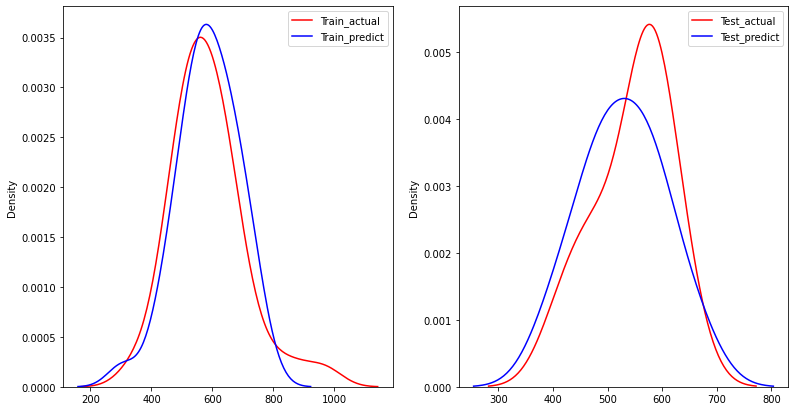

In [27]:
#visualize:
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
ax1=sns.distplot(y_train, hist=False, color='r',label='Train_actual')
sns.distplot(y_train_pred, hist=False, color='b', label='Train_predict', ax=ax1)
plt.legend()
plt.subplot(1,2,2)
ax2=sns.distplot(y_test,hist=False, color='r', label='Test_actual')
sns.distplot(y_test_pred,hist=False, color='b', label='Test_predict', ax=ax2)
plt.legend()
plt.show()

In [28]:
MES_test=mean_squared_error(y_test, y_test_pred)
MES_test

3082.0747851679625

In [30]:
r2_score(y_test, y_test_pred) #thấp, underfitting

0.29537114768772976